In [1]:
import pandas as pd
import numpy as np 
from nrclex import NRCLex 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from pathlib import Path 

from Utility_Fede import label,new_df,find_values,explode
from Sentiment_lists import fear_list, anger_list, trust_list, surprise_list, positive_list, negative_list, sadness_list, disgust_list, joy_list, anticipation_list

In [2]:
#read dataframe
df = pd.read_csv ('../dataframe/df_completec.csv')

In [ ]:
#Vedo quante parole nel testo pulito text1 sono presenti nella lista positive
df['result'] = df['text1'].apply(lambda x: find_values(x,positive_list))

In [11]:
#Elimino le righe in cui la lista è vuota []
#poichè il tweet non ha nessuna parola associata ad es alla lista positive

df2 = df[df['result'].map(lambda d: len(d)) > 0]
df2.head()

,Unnamed: 0.1,Unnamed: 0,_id,entities,conversation_id,author_id,geo,lang,attachments,public_metrics,text,created_at,id,context_annotations,text1,token,result
0,0,0,633029307275866112,"{'hashtags': [{'start': 22, 'end': 28, 'tag': ...",633029307275866112,1448623789,{'place_id': '54e862bb3ff2f749'},en,{'media_keys': ['3_633029305400954880']},"{'retweet_count': 2, 'reply_count': 0, 'like_c...",Adare Farm supporting #Adare in #LimerickGoing...,2015-08-16T21:35:22.000Z,633029307275866112,NaN,adare farm support adare limerickgoingforgold ...,"['adare', 'farm', 'support', 'adare', 'limeric...",[gold]
1,1,1,1514874742750261251,"{'mentions': [{'start': 21, 'end': 36, 'userna...",1514874742750261251,93829151,{'place_id': '54e862bb3ff2f749'},en,{'media_keys': ['3_1514874728154120195']},"{'retweet_count': 7, 'reply_count': 0, 'like_c...",Adare Manor team and @adaretidytowns ready for...,2022-04-15T07:54:18.000Z,1514874742750261251,NaN,adare manor team adaretidytown ready year s te...,"['adare', 'manor', 'team', 'adaretidytown', 'r...",[clean]
5,5,5,632977045291724800,"{'urls': [{'start': 117, 'end': 139, 'url': 'h...",632977045291724800,1448623789,{'place_id': '54e862bb3ff2f749'},en,{'media_keys': ['3_632977044134080512']},"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@Serendipityshoe asking for you to VOTE for #A...,2015-08-16T18:07:42.000Z,632977045291724800,"[{'domain': {'id': '19', 'name': 'Data Team Te...",serendipityshoe ask vote adare adaregoingforgo...,"['serendipityshoe', 'ask', 'vote', 'adare', 'a...","[gold, vote]"
6,6,6,633031275843072001,"{'hashtags': [{'start': 29, 'end': 35, 'tag': ...",633031275843072001,1448623789,{'place_id': '54e862bb3ff2f749'},en,{'media_keys': ['3_633031274404388864']},"{'retweet_count': 1, 'reply_count': 0, 'like_c...",The Village Fayre supporting #Adare by texting...,2015-08-16T21:43:11.000Z,633031275843072001,NaN,village fayre support adare texte gold adare n...,"['village', 'fayre', 'support', 'adare', 'text...",[gold]
8,8,8,1021125568979447808,"{'urls': [{'start': 124, 'end': 147, 'url': 'h...",1021125568979447808,25521305,{'place_id': '54e862bb3ff2f749'},und,{'media_keys': ['3_1021125557914865664']},"{'retweet_count': 0, 'reply_count': 0, 'like_c...",#flowers #ATeam #weekend #downtime #luxurywedd...,2018-07-22T20:11:21.000Z,1021125568979447808,"[{'domain': {'id': '13', 'name': 'Place', 'des...",flower ateam weekend downtime luxurywedde plan...,"['flower', 'ateam', 'weekend', 'downtime', 'lu...",[beautiful]


In [85]:
df2.explode("result").groupby(by="result")["result"].count().sort_values(ascending=False).head(25)#.plot(figsize=(10, 6), kind="barh")

# Tutto scritto in una funzione diventa :

In [95]:
df_result = explode(df,positive_list)

<AxesSubplot:ylabel='result'>

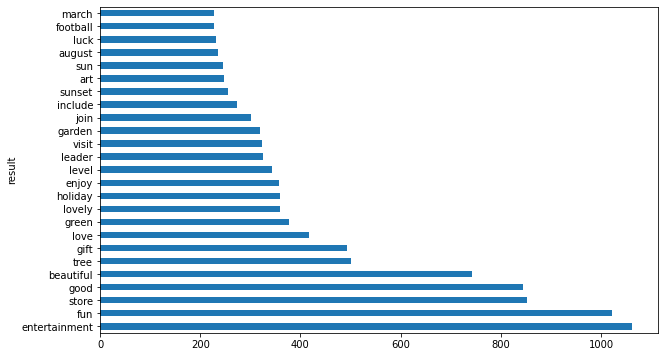

In [96]:
df_result.head(25).plot(figsize=(10, 6), kind="barh")

In [91]:
df_result2 = df_result.reset_index(name="count")

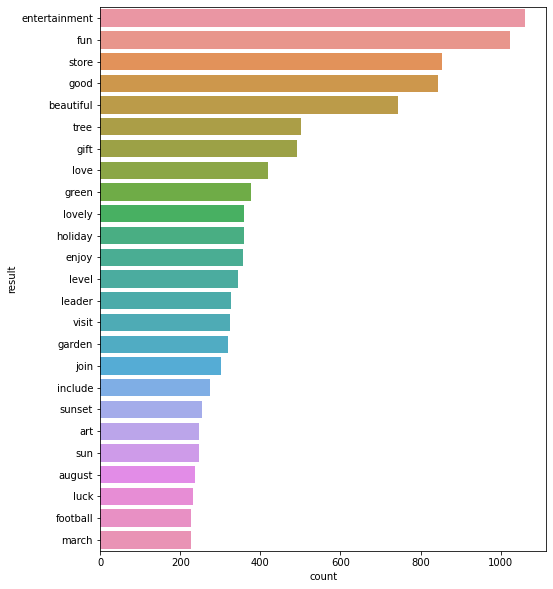

In [92]:
plt.figure(figsize=(8,10))
sns.barplot(y= 'result', x = 'count', data = df_result2[0:25]) #stampo le prime 25 parole che mi danno sentiment positive
plt.show()